In [1]:
import os
os.chdir(r'C:\Users\Navid\Documents\keyword_extraction_food_delivery')

In [144]:
#!conda install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import re

In [212]:
df = pd.read_csv('ubereat')

In [213]:
df.head()

,Unnamed: 0,feedback,rating
0,0,The app keeps crashing. It closes suddenly. I ...,Rated 1 stars out of five stars
1,1,I pay for the monthly pass... And I am pissed ...,Rated 1 stars out of five stars
2,2,"After half a year, the app didn't improve. App...",Rated 1 stars out of five stars
3,3,Worst app. Doesn't even run properly. App trie...,Rated 1 stars out of five stars
4,4,I can't get the app to open when on wifi. I ha...,Rated 1 stars out of five stars


In [214]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [215]:
df.dropna(inplace=True)

In [216]:
df.shape

(6000, 2)

In [217]:
# Lets extract digits from rating column and use them as rating + Convert them to int32
df['rating'] = df['rating'].str.extract('(\d)').astype('int32')

In [218]:
df.head()

,feedback,rating
0,The app keeps crashing. It closes suddenly. I ...,1
1,I pay for the monthly pass... And I am pissed ...,1
2,"After half a year, the app didn't improve. App...",1
3,Worst app. Doesn't even run properly. App trie...,1
4,I can't get the app to open when on wifi. I ha...,1


In [219]:
# Lets take out those reviews with the rating of 3 as they are netural. 
df = df[df.rating != 3]
df.rating.value_counts()

1    2581
5     983
2     951
4     814
Name: rating, dtype: int64

In [220]:
# Now we create a new column that groups together reviews with rating of 4 and 5 as positve and those with rating of 1 and 2 as negative
df['positively_rated'] = df['rating'].apply(lambda x: 1 if x == 4 or x == 5 else 0)

In [221]:
df.positively_rated.value_counts()

0    3532
1    1797
Name: positively_rated, dtype: int64

In [222]:
# a dictionary to replace contractions
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [225]:
# repalcing contractions 
df["feedback"] = df["feedback"].map(lambda x: " ".join([contractions[w.lower()] if w.lower() in contractions 
                                                        else w for w in x.split()]))

In [226]:
# let's test
df.loc[0,'feedback']

'The app keeps crashing. It closes suddenly. I thought it was because of my buggy old phone, but now I am using another phone model and it works well but the app keeps closing. I asked my friends and they told me it also occurs with them. I cannot even order. Plus the attendance is the worse. I lost one account because I lost my old phone and the number was gone as well, then I could not recover it, I asked for help and the support never came. iFood never did that to me.'

In [227]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict

In [228]:
# for lemmatizing, pos is needed
# The pos format it accepts is defferent what provided by pos_tag
# A defaultdict is defined to map the pos given bt pos_tag to those accepted by lemmatizer
tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV
lemma = WordNetLemmatizer()
def lemmatizer(text):
    words = word_tokenize(text)
    tags = pos_tag(words)
    lemmatized_tokens = []
    for count, word in enumerate(words): 
        lemmatized_tokens.append(lemma.lemmatize(word, tag_map[tags[count][1][0]]))
        joined_tokens = " ".join(lemmatized_tokens)
    return joined_tokens
df['feedback'] = df['feedback'].apply(lemmatizer)

In [232]:
df.loc[1,'feedback']

'I pay for the monthly pas ... And I be piss off because it will not connect . And yes I have uninstalled and reinstall . I have turn my phone one and off .... I need up use Doordash with no problem only it cost me more money because I do not have a pas there . I would like my 10 buck back at this point . Uber need help and no matter who I email I never hear anything back .'

In [235]:
stop_words = stopwords.words('english')
def prepare_review(review):
    tokens = word_tokenize(review)
    lowered_tokens = [w.lower() for w in tokens]
    tokens_sw_removed = [w for w in tokens if w.lower() not in stop_words and w.isalpha()]
    for count, token in enumerate(tokens_sw_removed):
        if token in good_words:
            tokens_sw_removed[count] = "good"
        elif token in bad_words:
            tokens_sw_removed[count] = "bad"
    return ' '.join(tokens_sw_removed)
df['review'] = df['feedback'].apply(prepare_review)

In [272]:
from nltk.util import ngrams
import string
text_filtered = df.loc[1,'feedback'].translate(str.maketrans('','', string.punctuation)) 
bi_grams = ngrams(word_tokenize(text_filtered), 2)
feedback = [ ' '.join(grams) for grams in bi_grams]
bi_grams2 = [pos_tag(w.split()) for w in feedback]
kept_bi_grams = []
for bi_gram in bi_grams2:
    if ((bi_gram[0][1][0] == "J" and bi_gram[1][1][0] == "N") 
    or (bi_gram[0][1][0] == "N" and bi_gram[1][1][0] == "N")):
        kept_bi_grams.append(bi_gram)

In [283]:
def bi_gram_generator(review):
    bi_grams = ngrams(word_tokenize(review), 2)
    review = [ ' '.join(grams) for grams in bi_grams]
    bi_gram_list = [pos_tag(w.split()) for w in review]
    kept_bi_grams = []
    for bi_gram in bi_gram_list:
        if ((bi_gram[0][1][0] == "J" and bi_gram[1][1][0] == "N") 
        or (bi_gram[0][1][0] == "N" and bi_gram[1][1][0] == "N")):
            kept_bi_grams.append(bi_gram)
    return [w[0][0]+" "+w[1][0] for w in kept_bi_grams]
df['bi_grams'] = df['review'].apply(bi_gram_generator)

In [287]:
df['bi_grams'][15]

['good service',
 'give use',
 'use couple',
 'couple gift',
 'gift card',
 'card redeem',
 'hassle place',
 'place order',
 'order ask',
 'ask form',
 'form payment',
 'forth time',
 'proceed gift',
 'gift carda']

In [ ]:
from nltk.corpus import stopwords

In [73]:
# Costum_stop_words =  ["colud", "please", "year", "sometimes", "even"]       

In [106]:
# based on the content some words have a same meaning
# we can define a dcit to convert them
good_words = ["easy", "great", "awesome", "fantastic"]
bad_words = ["teribble", "hard", "difficult"]

In [236]:
df.loc[0,'review']

'app keep crash close suddenly think buggy old phone use another phone model work well app keep closing ask friend tell also occur even order Plus attendance worse lose one account lose old phone number go well could recover ask help support never come iFood never'

In [237]:
# X = df['feedback']
X = df['review']
y = df['positively_rated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

In [238]:
vect = TfidfVectorizer(min_df = 5, ngram_range = (1,3)).fit(X_train)
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [239]:
len(vect.get_feature_names())

10738

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [241]:
model = LogisticRegression(C = 1)
model.fit(X_train_transformed, y_train)

LogisticRegression(C=1)

In [242]:
roc_auc_score(y_test, model.predict(X_test_transformed))

1.0

In [243]:
df_negative = df[df.positively_rated==0]
X_negative = df_negative['review']
df_positive=df[df.positively_rated==1]
X_positive = df_positive['review']
# vect2 = CountVectorizer(ngram_range = (1,2)).fit([' '.join(X_negative)])
# X_negative_transformed = vect2.transform([' '.join(X_negative)])
# vect3 = CountVectorizer(ngram_range = (1,2)).fit([' '.join(X_positive)])
# X_positive_transformed = vect3.transform([' '.join(X_positive)])

In [244]:
dict_text = {1:[' '.join(X_positive)],0:[' '.join(X_negative)]}
df_pos_rated = pd.DataFrame.from_dict(dict_text).transpose()
df_pos_rated.rename(columns={0:'text'},inplace=True)
vect4 = TfidfVectorizer(ngram_range = (1,3)).fit(df_pos_rated.text)
text_transformed = vect4.transform(df_pos_rated.text)

In [245]:
df_pos_rated_vectorized = pd.DataFrame(text_transformed.toarray(), columns=vect4.get_feature_names())

In [246]:
df_pos_rated_vectorized

,able,able app,able app give,able cancel,able cancel charge,able change,able change seem,able get,able get help,able log,...,yet keep get,yet look,yet look menu,yet needs,yet needs work,zero,zero could,zero could base,zero discount,zero discount money
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.008026,0.008026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.035114,0.004131,0.004131,0.004131,0.004131,0.004574,0.004574,0.004279,0.004279,0.004574,...,0.004574,0.000000,0.000000,0.004721,0.004721,0.008557,0.004279,0.004279,0.004279,0.004279


In [247]:
df_final = df_pos_rated_vectorized.transpose()
df_final

,0,1
able,0.0,0.035114
able app,0.0,0.004131
able app give,0.0,0.004131
able cancel,0.0,0.004131
able cancel charge,0.0,0.004131
...,...,...
zero,0.0,0.008557
zero could,0.0,0.004279
zero could base,0.0,0.004279
zero discount,0.0,0.004279


In [248]:
df_final.rename(columns={0:'negative', 1:'positive'},inplace=True)

In [249]:
top_dict = {}
for i in df_final.columns:
    top = df_final[i].sort_values(ascending=False).head(30)
    top_dict[i] = list(zip(top.index, top.values))
top_dict

{'negative': [('app', 0.4219540130701126),
  ('order', 0.3091746175999472),
  ('good', 0.251867185182015),
  ('use', 0.22331543949336555),
  ('food', 0.166619830197333),
  ('time', 0.1547912498406068),
  ('restaurant', 0.14051537699628205),
  ('delivery', 0.13602867410235142),
  ('like', 0.12073309605486064),
  ('issue', 0.11298333651079864),
  ('get', 0.09952322782900674),
  ('uber', 0.09218135036621117),
  ('service', 0.08402370874088275),
  ('driver', 0.08402370874088275),
  ('want', 0.06913601277465838),
  ('need', 0.06893207173402516),
  ('love', 0.06648477924642664),
  ('many', 0.06546507404326059),
  ('option', 0.06118231218996316),
  ('could', 0.06118231218996316),
  ('helpful', 0.06047935552818308),
  ('use app', 0.05628772721476611),
  ('also', 0.055471963052233265),
  ('sometimes', 0.055268022011600054),
  ('well', 0.05506408097096684),
  ('really', 0.054452257849067216),
  ('far', 0.054044375767800794),
  ('item', 0.04976161391450337),
  ('place', 0.04935373183323695),
  ('

In [250]:
df_negative = df[df.positively_rated==0]
X_negative = df_negative['review']
df_positive=df[df.positively_rated==1]
X_positive = df_positive['review']
vect2 = CountVectorizer(min_df=8, ngram_range = (2,2)).fit(X_negative)
X_negative_transformed = vect2.transform(X_negative)
vect3 = CountVectorizer(min_df=8, ngram_range = (2,2)).fit(X_positive)
X_positive_transformed = vect3.transform(X_positive)

In [251]:
df_pos_rated_vectorized = pd.DataFrame(X_positive_transformed.toarray(), columns=vect3.get_feature_names()).transpose()

In [252]:
df_pos_rated_vectorized

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
accept card,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access account,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
access hopefully,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accessible food,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
accidentally order,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrongly first,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yeah become,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
year cable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
year despite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [253]:
df_pos_rated_vectorized['average'] = df_pos_rated_vectorized.mean(axis=1) 

In [254]:
df_pos_rated_vectorized['average'].sort_values(ascending=False).head(40)

use app               0.153589
good use              0.085142
good app              0.084585
app good              0.084029
uber eats             0.083472
easy use              0.082916
love app              0.081803
delivery person       0.067891
use uber              0.067334
great app             0.066221
really good           0.066221
like app              0.065665
much good             0.065665
feel like             0.050640
app work              0.049527
customer service      0.048971
please fix            0.048971
pretty good           0.035615
app issue             0.035615
make change           0.035615
issue get             0.035615
order food            0.035058
could go              0.035058
want order            0.035058
order correctly       0.035058
order restaurant      0.034502
never issue           0.034502
super convenient      0.034502
issue app             0.034502
good service          0.034502
door dash             0.034502
app helpful           0.034502
restaura

In [255]:
df_neg_rated_vectorized = pd.DataFrame(X_negative_transformed.toarray(), columns=vect2.get_feature_names()).transpose()

In [256]:
df_neg_rated_vectorized['average'] = df_neg_rated_vectorized.mean(axis=1) 

In [257]:
df_neg_rated_vectorized['average'].sort_values(ascending=False).head(40)

phone number             0.138165
use app                  0.136750
customer service         0.061438
app keep                 0.051529
order app                0.050963
app work                 0.050963
get food                 0.050396
uber eats                0.048698
payment method           0.043601
customer support         0.043601
try use                  0.043601
get error                0.043318
app sometimes            0.043035
never use                0.042186
email address            0.041903
get app                  0.034824
credit card              0.034541
app get                  0.034541
order go                 0.034541
first time               0.034541
delivery fee             0.034541
server error             0.034258
ask rate                 0.033975
several time             0.033692
time order               0.033692
time use                 0.033692
uninstalled reinstall    0.033409
app tell                 0.033409
place order              0.033409
keep ask      

In [258]:
df_neg = df_neg_rated_vectorized.sort_values('average', ascending=False).head(100)

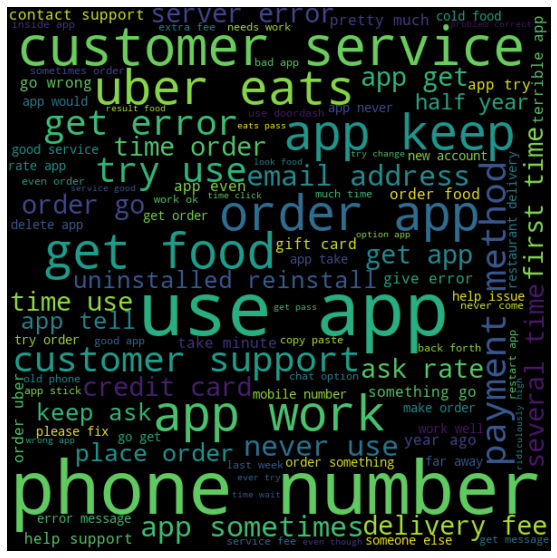

In [259]:
from wordcloud import WordCloud , STOPWORDS
wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , stopwords = STOPWORDS)
wc.generate_from_frequencies(df_neg['average'].to_dict())
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [260]:
df_pos = df_pos_rated_vectorized.sort_values('average', ascending=False).head(50)

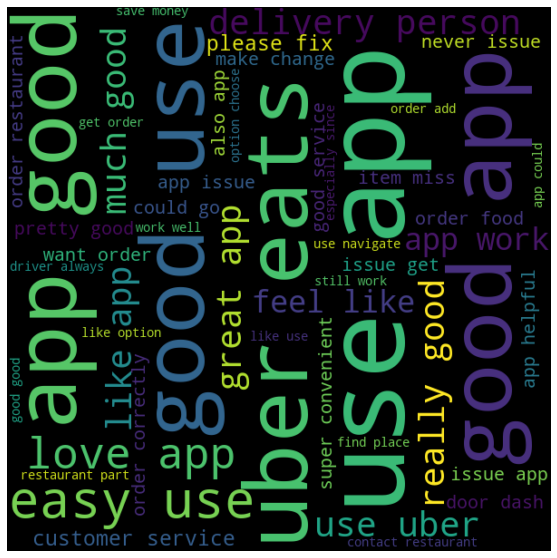

In [261]:
wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , stopwords = STOPWORDS)
wc.generate_from_frequencies(df_pos['average'].to_dict())
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

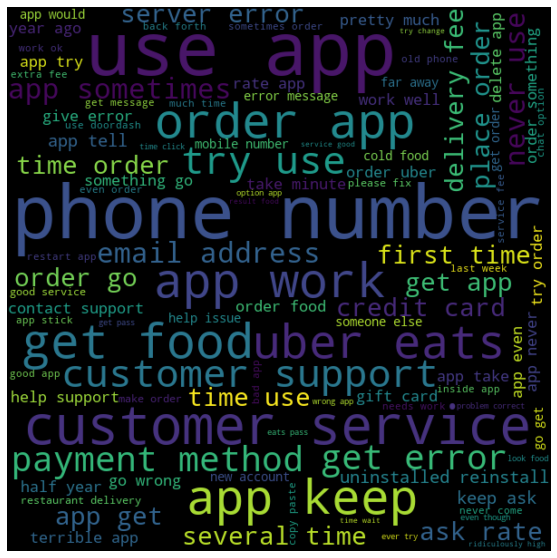

In [262]:
wc = WordCloud(width = 600 , height = 600 , background_color = 'black' , stopwords = STOPWORDS)
wc.generate_from_frequencies(df_neg['average'].to_dict())
plt.figure(figsize  = (10,10))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [104]:
df_neg_rated_vectorized['average'].to_dict()

{'able app': 0.007927519818799546,
 'able cancel': 0.007927519818799546,
 'able change': 0.008776896942242356,
 'able get': 0.008210645526613816,
 'able log': 0.008776896942242356,
 'able order': 0.008776896942242356,
 'able removing': 0.008776896942242356,
 'able talk': 0.008210645526613816,
 'absolute installed': 0.007927519818799546,
 'absolutely shameless': 0.007927519818799546,
 'accept card': 0.008776896942242356,
 'accept email': 0.009060022650056626,
 'accept payment': 0.007927519818799546,
 'access app': 0.009060022650056626,
 'access basket': 0.008493771234428085,
 'accidentally put': 0.008776896942242356,
 'account already': 0.008210645526613816,
 'account app': 0.008210645526613816,
 'account cause': 0.008776896942242356,
 'account computer': 0.008776896942242356,
 'account could': 0.008210645526613816,
 'account delete': 0.008493771234428085,
 'account dl': 0.008493771234428085,
 'account enter': 0.008210645526613816,
 'account help': 0.008210645526613816,
 'account inconv